In [26]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, filters, transform, exposure
import cv2
from numba import jit
import matplotlib as mpl

In [3]:
nebula_alpha = io.imread('/home/vacilo/github/natural_artificial_vision/imagens_teste/southern_ring_nebula.png')
print("Shape of nebula: ", nebula_alpha.shape)
baboon = io.imread('/home/vacilo/github/natural_artificial_vision/imagens_teste/baboon.tiff')
print("Shape of baboon: ", baboon.shape)
earth = io.imread('/home/vacilo/github/natural_artificial_vision/imagens_teste/Earth.bmp')
print("Shape of earth: ", earth.shape)
dog = io.imread('/home/vacilo/github/natural_artificial_vision/imagens_teste/Malamute.bmp')
print("Shape of dpg: ", dog.shape)
rua = io.imread('/home/vacilo/github/natural_artificial_vision/imagens_teste/img11_5439.JPG')
print("Shape of rua: ", rua.shape)
statue = io.imread('/home/vacilo/github/natural_artificial_vision/imagens_teste/IMG_5387.JPG')
print("Shape of statue: ", statue.shape)
panda = io.imread('/home/vacilo/github/natural_artificial_vision/imagens_teste/panda.jpg')
print("Shape of statue: ", panda.shape)
lenna = io.imread('/home/vacilo/github/natural_artificial_vision/imagens_teste/lenna.png')
print("Shape of statue: ", lenna.shape)
com_copo = io.imread('/home/vacilo/github/natural_artificial_vision/imagens_teste/com_copo.jpeg')
print("Shape of statue: ", com_copo.shape)
sem_copo = io.imread('/home/vacilo/github/natural_artificial_vision/imagens_teste/sem_copo.jpeg')
print("Shape of statue: ", sem_copo.shape)

Shape of nebula:  (720, 770, 4)
Shape of baboon:  (512, 512, 3)
Shape of earth:  (768, 749, 3)
Shape of dpg:  (1080, 1616, 3)
Shape of rua:  (1728, 2592, 3)
Shape of statue:  (1728, 2592, 3)
Shape of statue:  (512, 512, 3)
Shape of statue:  (512, 512, 3)
Shape of statue:  (1600, 900, 3)
Shape of statue:  (1600, 900, 3)


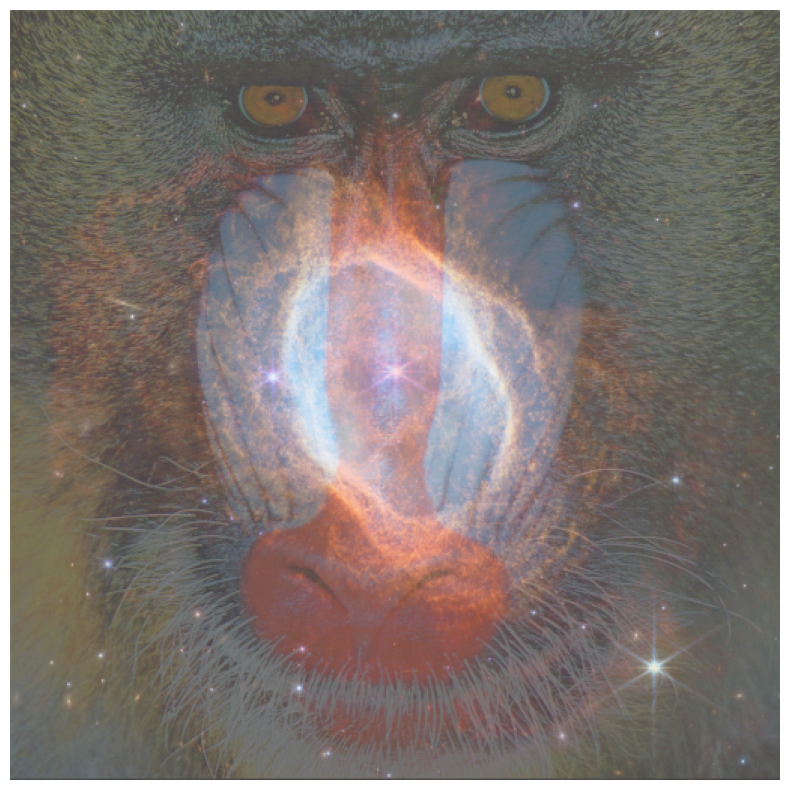

In [4]:
#babuino estelar
plt.figure(figsize=(10,10))

nebulosa_baboon = transform.resize(nebula_alpha, (512, 512), anti_aliasing=True)

plt.imshow(baboon, alpha=0.5)
plt.imshow(nebulosa_baboon, alpha=0.5)




plt.axis('off')
plt.show()

In [5]:
#tirando alpha de nebula
nebula = nebula_alpha[:,:,:3]
print(nebula.shape)

#nebula cinza
gray_nebula = color.rgb2gray(nebula)
print(gray_nebula.shape)
x = np.array(gray_nebula)


(720, 770, 3)
(720, 770)


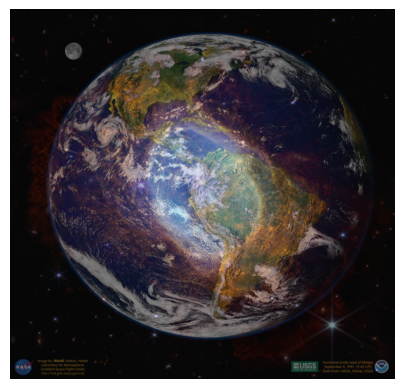

In [6]:
#soma de imagens
nebula_earth = transform.resize(nebula, (720,749), anti_aliasing=True)
earth_nebula = transform.resize(earth, (720,749), anti_aliasing=True)

def sum_img(img1, x, img2, y):
    new_img = x*img1 + y*img2
    return new_img

sum_nebula_earth = sum_img(nebula_earth,0.5,earth_nebula,0.5)

plt.imshow(sum_nebula_earth)
plt.axis('off')
plt.show()

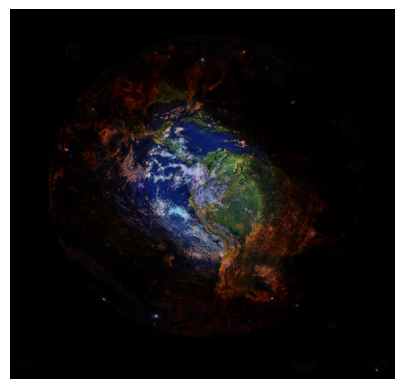

In [7]:
#multiplicação de imagens
def mult_img(img1,img2):
    new_img = img1 * img2
    return new_img

mult_nebula_earth = mult_img(nebula_earth,earth_nebula)

plt.imshow(mult_nebula_earth)
plt.axis('off')
plt.show()


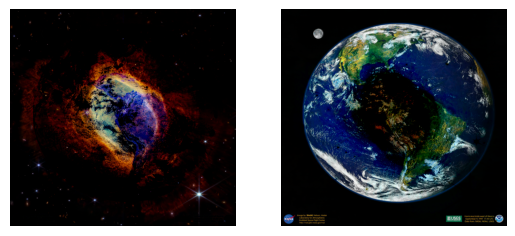

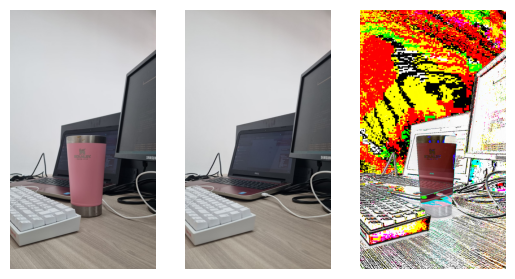

In [8]:
#subtração de imagens
def subt_img(img1, img2):
    new_img = np.clip(img1 - img2, 0, 255)
    return new_img

subt_nebula_earth = subt_img(nebula_earth, earth_nebula)
subt_earth_nebula = subt_img(earth_nebula,nebula_earth)

plt.subplot(1,2,1)
plt.imshow(subt_nebula_earth)
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(subt_earth_nebula)
plt.axis('off')
plt.show()

subt_copo = subt_img(com_copo,sem_copo)

plt.subplot(1,3,1)
plt.imshow(com_copo)
plt.axis('off')
plt.subplot(1,3,2)
plt.imshow(sem_copo)
plt.axis('off')
plt.subplot(1,3,3)
plt.imshow(subt_copo)
plt.axis('off')
plt.show()


In [72]:
#normalização
def normar(img):
    for i in range(img.shape[1]):
      array = img[:,i]
      min_val = np.min(array)
      max_val = np.max(array)
      normalized_array = 255 * ((array - min_val) / (max_val - min_val))
      img[:,i] = normalized_array.astype(np.uint8)
    return img.astype(np.uint8)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


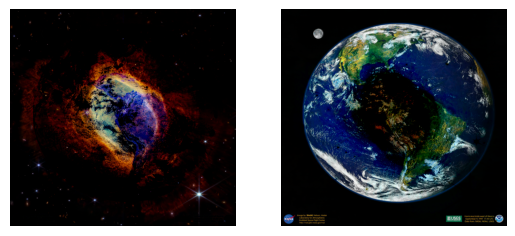

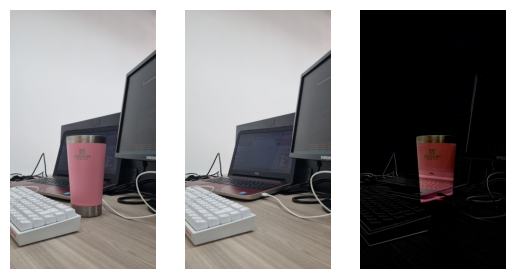

In [9]:
#subtração de imagens skimage
#subtração de imagens
def subt_img(img1, img2):
    new_img = np.clip(img1 - img2, 0, 255)
    return new_img

subt_nebula_earth = cv2.subtract(nebula_earth, earth_nebula)
subt_earth_nebula = cv2.subtract(earth_nebula,nebula_earth)

plt.subplot(1,2,1)
plt.imshow(subt_nebula_earth)
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(subt_earth_nebula)
plt.axis('off')
plt.show()

subt_copo = cv2.subtract(com_copo,sem_copo)

plt.subplot(1,3,1)
plt.imshow(com_copo)
plt.axis('off')
plt.subplot(1,3,2)
plt.imshow(sem_copo)
plt.axis('off')
plt.subplot(1,3,3)
plt.imshow(subt_copo)
plt.axis('off')
plt.show()


(720, 749)
(720, 749)


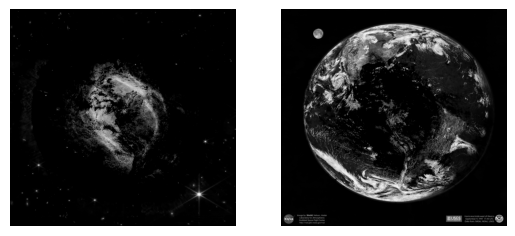

(1600, 900)


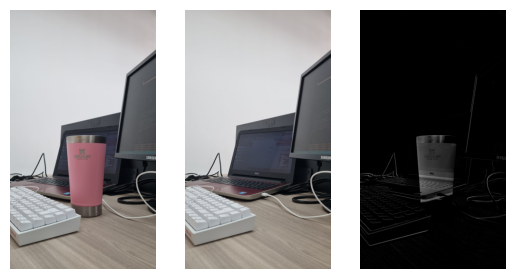

In [10]:
#subtração de imagens pixel à pixel

def subt_img(img1, img2):
    img1 = color.rgb2gray(img1)
    img2 = color.rgb2gray(img2)
    new_image = np.zeros((img1.shape[0],img1.shape[1]))
    print(new_image.shape)
    for i in range(0,(img1.shape[0])):
        for j in range(0,(img1.shape[1])):
            new_image[i,j] = np.clip(img1[i,j] - img2[i,j],0,255)
            value = new_image[i,j]
            if value < 25:
                new_image[i,j] == 0
            else:
                continue
    new_image = color.gray2rgb(new_image)
    return new_image

subt_nebula_earth = subt_img(nebula_earth, earth_nebula)
subt_earth_nebula = subt_img(earth_nebula,nebula_earth)

plt.subplot(1,2,1)
plt.imshow(subt_nebula_earth)
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(subt_earth_nebula)
plt.axis('off')
plt.show()

subt_copo = subt_img(com_copo,sem_copo)

plt.subplot(1,3,1)
plt.imshow(com_copo)
plt.axis('off')
plt.subplot(1,3,2)
plt.imshow(sem_copo)
plt.axis('off')
plt.subplot(1,3,3)
plt.imshow(subt_copo)
plt.axis('off')
plt.show()

In [61]:
#histogramas de imagem
def histogram_gray(img):
    if img.ndim == 3:
        img = color.rgb2gray(img)
    else:
        img = img/255
    hist = np.zeros((256),dtype=np.int64)
    acompanhante = np.zeros((256),dtype=np.int64)
    for i in range(0,(img.shape[0])):
        for j in range(0,(img.shape[1])):
            value = int(img[i,j]*255)
            hist[value] += 1
    return hist

def histogram(img):
    hist = np.zeros((256),dtype=np.int64)
    acompanhante = np.zeros((256),dtype=np.int64)
    for i in range(0,(img.shape[0])):
        for j in range(0,(img.shape[1])):
            value = np.clip(int(img[i,j]*255),0,255)
            hist[value] += 1
    return hist

hist_baboon = histogram_gray(baboon)


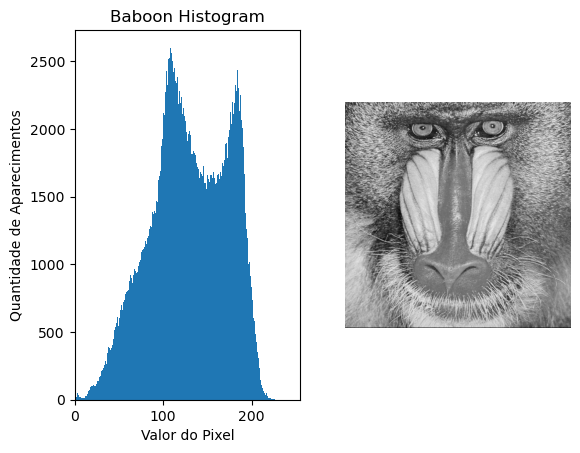

In [12]:
#print(color.rgb2gray(nebula))
gray_baboon = color.rgb2gray(baboon)

plt.subplot(1,2,1)
plt.stairs(hist_baboon, fill=True,lw=10)
plt.xlim(0,255)
plt.xlabel('Valor do Pixel')
plt.ylabel('Quantidade de Aparecimentos')
plt.title('Baboon Histogram')
plt.subplot(1,2,2)
plt.imshow(gray_baboon,cmap='gray')
plt.axis('off')
plt.show()





/tmp/ipykernel_80477/3378803479.py:4: RuntimeWarning: divide by zero encountered in log
  img1 = np.clip(1+np.log(img1), 0, 1)* 255


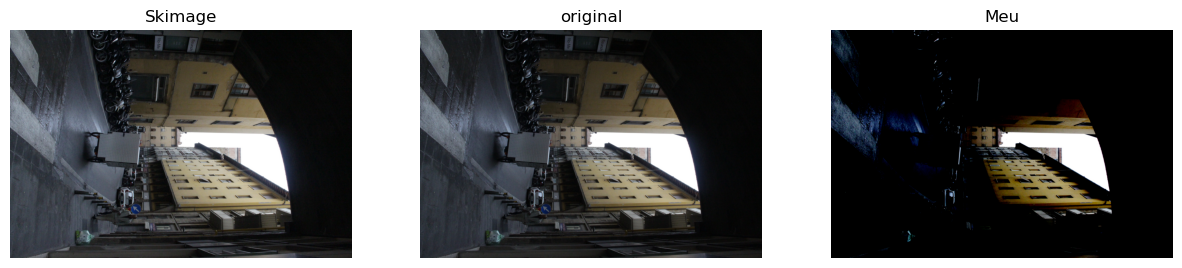

In [91]:
#logaritmo de imagem
def log_img(img):
    img1 = (img - np.min(img)) / (np.max(img) - np.min(img))
    img1 = np.clip(1+np.log(img1), 0, 1)* 255
    
    return img1.astype(np.uint8)

log_rua = log_img(rua)
log_rua_skimg = exposure.adjust_log(rua)

plt.figure(figsize=(15,10))
plt.subplot(1,3,1)
plt.title('Skimage')
plt.imshow(log_rua_skimg)
plt.axis('off')
plt.subplot(1,3,2)
plt.title('original')
plt.imshow(rua)
plt.axis('off')
plt.subplot(1,3,3)
plt.title('Meu')
plt.imshow(log_rua)
plt.axis('off')
plt.show()

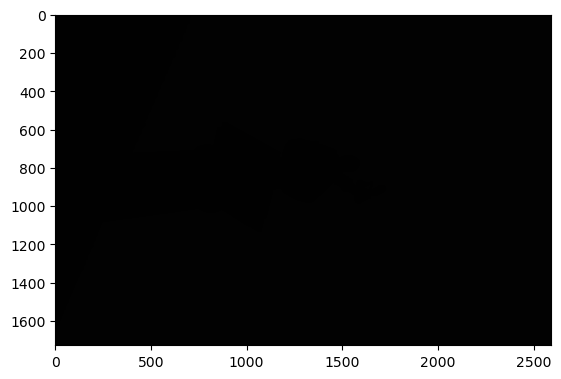

In [37]:
#exponencial de imagem
def exp_img(img):
    img1 = (img - np.min(img)) / (np.max(img) - np.min(img))
    img1 = np.clip(np.exp(img1), 0, 255)
    return img1.astype(np.uint8)

exp_statue = exp_img(statue)

plt.imshow(exp_statue)
plt.show()

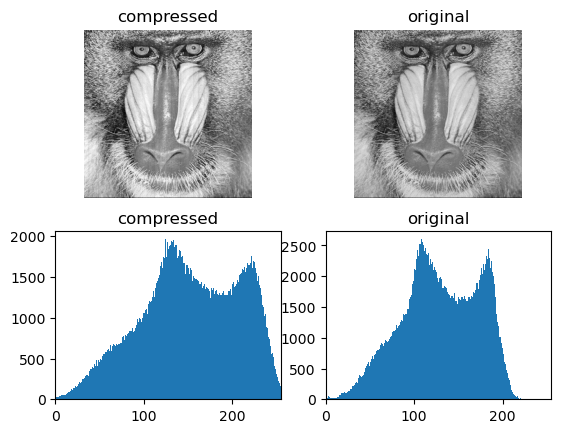

In [78]:
#compressão de imagem
def compression(img,c): #c é força de compressão
    new_img = color.rgb2gray(img)
    for i in range(0, new_img.shape[0]):
        for j in range(0, new_img.shape[1]):
            if new_img[i,j] <=127:
                new_img[i,j] -= c
            else:
                new_img[i,j] += c
    
    return new_img


compressed_baboon = compression(baboon, 20)
compressed_baboon = normar(compressed_baboon)
hist_compressed = histogram_gray(compressed_baboon)
hist_baboon = histogram_gray(baboon)



plt.subplot(2,2,1)
plt.imshow(compressed_baboon, cmap='gray')
plt.title('compressed')
plt.axis('off')
plt.subplot(2,2,2)
plt.title('original')
plt.imshow(gray_baboon, cmap='gray')
plt.axis('off')
plt.subplot(2,2,3)
plt.stairs(hist_compressed, fill=True,lw=10)
plt.title('compressed')
plt.xlim(0,255)
plt.subplot(2,2,4)
plt.title('original')
plt.stairs(hist_baboon, fill=True,lw=10)
plt.xlim(0,255)

plt.show()

[[103 134  69 ...  57 191 110]
 [209  88  36 ...  77 103 140]
 [ 42 124  59 ...  13 186 133]
 ...
 [ 44 103  15 ...  56 205 109]
 [ 31  34 119 ...  63  56 253]
 [  3   3   3 ...   3   3   3]]


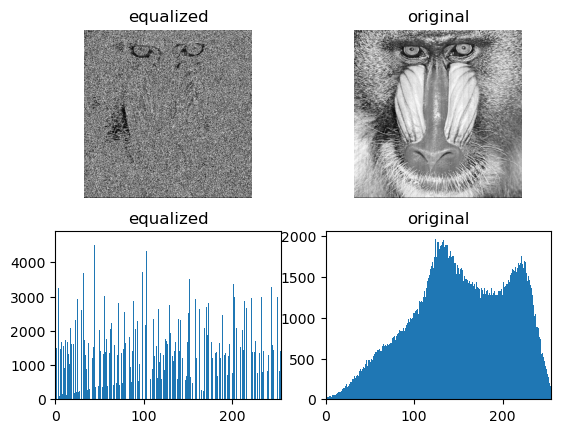

In [97]:
#equalização
def eq_img(img):
    hist, _ = np.histogram(img.flatten(), bins=256, range=(0, 255))
    cdf = hist.cumsum()
    cdf_normalized = cdf * hist.max() / (cdf.max() - cdf.min())
    equalized_img = np.interp(img.flatten(), range(256), cdf_normalized).reshape(img.shape)
   
    return equalized_img.astype(np.uint8)

equalized_baboon = eq_img(gray_baboon)
print(equalized_baboon)
#norm_eq = normar(equalized_baboon)
#norm_grayb = normar(gray_baboon)
hist_comp = histogram_gray(equalized_baboon)
hist_gray = histogram_gray(gray_baboon)

plt.subplot(2,2,1)
plt.imshow(equalized_baboon, cmap='gray')
plt.title('equalized')
plt.axis('off')
plt.subplot(2,2,2)
plt.title('original')
plt.imshow(gray_baboon, cmap='gray')
plt.axis('off')
plt.subplot(2,2,3)
plt.stairs(hist_comp, fill=True,lw=10)
plt.title('equalized')
plt.xlim(0,255)
plt.subplot(2,2,4)
plt.title('original')
plt.stairs(hist_gray, fill=True,lw=10)
plt.xlim(0,255)

plt.show()
